In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch

df = pd.read_csv('UpdatedMatches.csv')
data = []

C:\Users\herath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

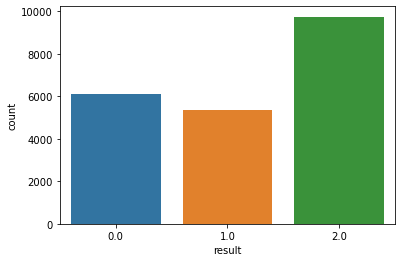

In [2]:
df['season'].replace({'2008/2009':2008, '2009/2010':2009, '2010/2011':2010, '2011/2012':2011, '2012/2013':2012, '2013/2014':2013, '2014/2015':2014, '2015/2016':2015 },inplace=True)

df["result"] = np.nan
for index, row in df.iterrows():
    if df.loc[index,'home_team_goal'] == df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 1
    if df.loc[index,'home_team_goal'] > df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 2
    if df.loc[index,'home_team_goal'] < df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 0
        
sns.countplot(df.result)


In [3]:
df.result.value_counts()/df.shape[0]

2.0    0.459098
0.0    0.288525
1.0    0.252377
Name: result, dtype: float64

In [4]:
from tqdm import tqdm

def teamfunction( df ):
    for index, row in tqdm(df.iterrows()):
        
        home_team = []
        home_team.append(df.loc[index,'buildUpPlaySpeed_home_team'])
        home_team.append(df.loc[index,'buildUpPlayDribbling_home_team'])
        home_team.append(df.loc[index,'buildUpPlayPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationCrossing_home_team'])
        home_team.append(df.loc[index,'chanceCreationShooting_home_team'])
        home_team.append(df.loc[index,'defencePressure_home_team'])
        home_team.append(df.loc[index,'defenceAggression_home_team'])
        home_team.append(df.loc[index,'defenceTeamWidth_home_team'])


        away_team = []
        away_team.append(df.loc[index,'buildUpPlaySpeed_away_team'])
        away_team.append(df.loc[index,'buildUpPlayDribbling_away_team'])
        away_team.append(df.loc[index,'buildUpPlayPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationCrossing_away_team'])
        away_team.append(df.loc[index,'chanceCreationShooting_away_team'])
        away_team.append(df.loc[index,'defencePressure_away_team'])
        away_team.append(df.loc[index,'defenceAggression_away_team'])
        away_team.append(df.loc[index,'defenceTeamWidth_away_team'])


        team_matrix = []
        for i in range(9):          
            m =[]
            for j in range(9):
                m.append(home_team[i]-away_team[j])
            team_matrix.append(m)

        team_details.append(team_matrix)


In [5]:
X = df.drop(['result','date', 'home_team_goal','away_team_goal'], axis=1)
y = df[['result']]
RANDOM_SEED =42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [6]:
y_train.result.value_counts()/y_train.shape[0]

2.0    0.458637
0.0    0.290715
1.0    0.250647
Name: result, dtype: float64

In [7]:
y_train.result.value_counts()

2.0    7795
0.0    4941
1.0    4260
Name: result, dtype: int64

In [8]:
team_details = []
teamfunction( X_train )
team_train_data = team_details
Team_Train = torch.Tensor(np.array(team_train_data))

16996it [00:24, 706.97it/s]


In [9]:
Team_Train.size()

torch.Size([16996, 9, 9])

In [10]:
Team_Train.type()

'torch.FloatTensor'

In [11]:
team_details = []
teamfunction( X_test )
team_test_data = team_details
Team_Test = torch.Tensor(np.array(team_test_data))

4250it [00:06, 649.20it/s]


In [12]:
Team_Test.size()

torch.Size([4250, 9, 9])

In [13]:
Team_Test.type()

'torch.FloatTensor'

In [14]:
y_train = torch.squeeze(torch.LongTensor(np.array(y_train)))

In [15]:
y_train.size()

torch.Size([16996])

In [16]:
y_train.type()

'torch.LongTensor'

In [17]:
y_test = torch.squeeze(torch.LongTensor(np.array(y_test)))

In [18]:
y_test.size()

torch.Size([4250])

In [19]:
y_test.type()

'torch.LongTensor'

In [35]:
Team_Train = torch.flatten(Team_Train, start_dim=1)
Team_Test = torch.flatten(Team_Test, start_dim=1)

In [36]:
Team_Train.size()

torch.Size([16996, 81])

In [37]:
Team_Test.size()

torch.Size([4250, 81])

In [71]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(Team_Train, y_train)
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)

test = data_utils.TensorDataset(Team_Test, y_test)
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

In [72]:
import torch
from torch import nn, optim
import torch.nn.functional as F

#building neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(81,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,3)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x

In [73]:
model = Net()

In [74]:
weights = [1/4941, 1/4260, 1/7795 ]
optimizer = optim.SGD(model.parameters(), lr=0.001)
class_weights = torch.FloatTensor(weights)
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [75]:
#Doing it on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Team_Train = Team_Train.to(device)
Team_Test = Team_Test.to(device)

y_train = y_train.to(device)
y_test = y_test.to(device)

model = model.to(device)
criterion = criterion.to(device)

In [76]:
epochs = 1000
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []

for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    
    total = 0
    # training our model
    for idx, (x, y) in enumerate(train_loader):

        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred, y)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
    accuracy_train = total / len(Team_Train)
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    model.eval()
    total = 0
    for idx, (x, y) in enumerate(test_loader):
        pred = model(x)
        loss = criterion(pred, y)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy_val = total / len(Team_Test)
    accuracy_total_val.append(accuracy_val)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 1 == 0:
        print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val))

Epoch: 0/1000   Training loss: 1.1113   Testing loss: 1.0996   Train accuracy: 0.3066   Test accuracy: 0.3059  
Epoch: 1/1000   Training loss: 1.1041   Testing loss: 1.0991   Train accuracy: 0.3114   Test accuracy: 0.2986  
Epoch: 2/1000   Training loss: 1.1013   Testing loss: 1.0991   Train accuracy: 0.3049   Test accuracy: 0.2894  
Epoch: 3/1000   Training loss: 1.1004   Testing loss: 1.0989   Train accuracy: 0.3051   Test accuracy: 0.2849  
Epoch: 4/1000   Training loss: 1.0992   Testing loss: 1.0988   Train accuracy: 0.3042   Test accuracy: 0.2847  
Epoch: 5/1000   Training loss: 1.0998   Testing loss: 1.0988   Train accuracy: 0.2962   Test accuracy: 0.2849  
Epoch: 6/1000   Training loss: 1.0989   Testing loss: 1.0987   Train accuracy: 0.3032   Test accuracy: 0.2854  
Epoch: 7/1000   Training loss: 1.0988   Testing loss: 1.0988   Train accuracy: 0.3008   Test accuracy: 0.2852  
Epoch: 8/1000   Training loss: 1.0993   Testing loss: 1.0987   Train accuracy: 0.2998   Test accuracy: 0

Epoch: 73/1000   Training loss: 1.0987   Testing loss: 1.0985   Train accuracy: 0.2971   Test accuracy: 0.2809  
Epoch: 74/1000   Training loss: 1.0985   Testing loss: 1.0985   Train accuracy: 0.2982   Test accuracy: 0.2809  
Epoch: 75/1000   Training loss: 1.0986   Testing loss: 1.0985   Train accuracy: 0.2956   Test accuracy: 0.2809  
Epoch: 76/1000   Training loss: 1.0987   Testing loss: 1.0985   Train accuracy: 0.2968   Test accuracy: 0.2807  
Epoch: 77/1000   Training loss: 1.0984   Testing loss: 1.0985   Train accuracy: 0.2988   Test accuracy: 0.2807  
Epoch: 78/1000   Training loss: 1.0984   Testing loss: 1.0985   Train accuracy: 0.2997   Test accuracy: 0.2812  
Epoch: 79/1000   Training loss: 1.0985   Testing loss: 1.0985   Train accuracy: 0.2978   Test accuracy: 0.2809  
Epoch: 80/1000   Training loss: 1.0986   Testing loss: 1.0986   Train accuracy: 0.3007   Test accuracy: 0.2814  
Epoch: 81/1000   Training loss: 1.0987   Testing loss: 1.0985   Train accuracy: 0.2984   Test ac

Epoch: 146/1000   Training loss: 1.0982   Testing loss: 1.0984   Train accuracy: 0.3044   Test accuracy: 0.2887  
Epoch: 147/1000   Training loss: 1.0982   Testing loss: 1.0983   Train accuracy: 0.3034   Test accuracy: 0.2887  
Epoch: 148/1000   Training loss: 1.0983   Testing loss: 1.0986   Train accuracy: 0.3055   Test accuracy: 0.2878  
Epoch: 149/1000   Training loss: 1.0985   Testing loss: 1.0986   Train accuracy: 0.3043   Test accuracy: 0.2889  
Epoch: 150/1000   Training loss: 1.0980   Testing loss: 1.0984   Train accuracy: 0.3060   Test accuracy: 0.2894  
Epoch: 151/1000   Training loss: 1.0985   Testing loss: 1.0983   Train accuracy: 0.3037   Test accuracy: 0.2899  
Epoch: 152/1000   Training loss: 1.0984   Testing loss: 1.0984   Train accuracy: 0.3024   Test accuracy: 0.2889  
Epoch: 153/1000   Training loss: 1.0986   Testing loss: 1.0984   Train accuracy: 0.3027   Test accuracy: 0.2887  
Epoch: 154/1000   Training loss: 1.0981   Testing loss: 1.0984   Train accuracy: 0.3042 

Epoch: 218/1000   Training loss: 1.0981   Testing loss: 1.0982   Train accuracy: 0.3087   Test accuracy: 0.2951  
Epoch: 219/1000   Training loss: 1.0978   Testing loss: 1.0983   Train accuracy: 0.3107   Test accuracy: 0.2955  
Epoch: 220/1000   Training loss: 1.0983   Testing loss: 1.0982   Train accuracy: 0.3084   Test accuracy: 0.2948  
Epoch: 221/1000   Training loss: 1.0979   Testing loss: 1.0981   Train accuracy: 0.3098   Test accuracy: 0.2953  
Epoch: 222/1000   Training loss: 1.0981   Testing loss: 1.0983   Train accuracy: 0.3097   Test accuracy: 0.2951  
Epoch: 223/1000   Training loss: 1.0979   Testing loss: 1.0983   Train accuracy: 0.3110   Test accuracy: 0.2955  
Epoch: 224/1000   Training loss: 1.0982   Testing loss: 1.0982   Train accuracy: 0.3105   Test accuracy: 0.2953  
Epoch: 225/1000   Training loss: 1.0981   Testing loss: 1.0980   Train accuracy: 0.3090   Test accuracy: 0.2953  
Epoch: 226/1000   Training loss: 1.0984   Testing loss: 1.0983   Train accuracy: 0.3077 

Epoch: 290/1000   Training loss: 1.0982   Testing loss: 1.0981   Train accuracy: 0.3124   Test accuracy: 0.3002  
Epoch: 291/1000   Training loss: 1.0977   Testing loss: 1.0980   Train accuracy: 0.3122   Test accuracy: 0.3007  
Epoch: 292/1000   Training loss: 1.0978   Testing loss: 1.0981   Train accuracy: 0.3145   Test accuracy: 0.3009  
Epoch: 293/1000   Training loss: 1.0979   Testing loss: 1.0983   Train accuracy: 0.3133   Test accuracy: 0.3005  
Epoch: 294/1000   Training loss: 1.0974   Testing loss: 1.0980   Train accuracy: 0.3150   Test accuracy: 0.3016  
Epoch: 295/1000   Training loss: 1.0977   Testing loss: 1.0976   Train accuracy: 0.3134   Test accuracy: 0.3012  
Epoch: 296/1000   Training loss: 1.0978   Testing loss: 1.0985   Train accuracy: 0.3116   Test accuracy: 0.3012  
Epoch: 297/1000   Training loss: 1.0985   Testing loss: 1.0980   Train accuracy: 0.3106   Test accuracy: 0.3009  
Epoch: 298/1000   Training loss: 1.0978   Testing loss: 1.0980   Train accuracy: 0.3127 

Epoch: 362/1000   Training loss: 1.0969   Testing loss: 1.0974   Train accuracy: 0.3262   Test accuracy: 0.3099  
Epoch: 363/1000   Training loss: 1.0973   Testing loss: 1.0968   Train accuracy: 0.3254   Test accuracy: 0.3094  
Epoch: 364/1000   Training loss: 1.0973   Testing loss: 1.0970   Train accuracy: 0.3234   Test accuracy: 0.3099  
Epoch: 365/1000   Training loss: 1.0972   Testing loss: 1.0971   Train accuracy: 0.3246   Test accuracy: 0.3101  
Epoch: 366/1000   Training loss: 1.0979   Testing loss: 1.0972   Train accuracy: 0.3232   Test accuracy: 0.3104  
Epoch: 367/1000   Training loss: 1.0974   Testing loss: 1.0969   Train accuracy: 0.3249   Test accuracy: 0.3104  
Epoch: 368/1000   Training loss: 1.0972   Testing loss: 1.0970   Train accuracy: 0.3210   Test accuracy: 0.3108  
Epoch: 369/1000   Training loss: 1.0974   Testing loss: 1.0968   Train accuracy: 0.3261   Test accuracy: 0.3108  
Epoch: 370/1000   Training loss: 1.0973   Testing loss: 1.0968   Train accuracy: 0.3243 

Epoch: 434/1000   Training loss: 1.0969   Testing loss: 1.0959   Train accuracy: 0.3341   Test accuracy: 0.3280  
Epoch: 435/1000   Training loss: 1.0962   Testing loss: 1.0960   Train accuracy: 0.3395   Test accuracy: 0.3287  
Epoch: 436/1000   Training loss: 1.0971   Testing loss: 1.0958   Train accuracy: 0.3410   Test accuracy: 0.3280  
Epoch: 437/1000   Training loss: 1.0963   Testing loss: 1.0960   Train accuracy: 0.3423   Test accuracy: 0.3294  
Epoch: 438/1000   Training loss: 1.0965   Testing loss: 1.0959   Train accuracy: 0.3415   Test accuracy: 0.3313  
Epoch: 439/1000   Training loss: 1.0965   Testing loss: 1.0954   Train accuracy: 0.3444   Test accuracy: 0.3334  
Epoch: 440/1000   Training loss: 1.0973   Testing loss: 1.0957   Train accuracy: 0.3410   Test accuracy: 0.3320  
Epoch: 441/1000   Training loss: 1.0970   Testing loss: 1.0957   Train accuracy: 0.3391   Test accuracy: 0.3296  
Epoch: 442/1000   Training loss: 1.0967   Testing loss: 1.0960   Train accuracy: 0.3393 

Epoch: 506/1000   Training loss: 1.0971   Testing loss: 1.0950   Train accuracy: 0.3485   Test accuracy: 0.3433  
Epoch: 507/1000   Training loss: 1.0961   Testing loss: 1.0948   Train accuracy: 0.3523   Test accuracy: 0.3440  
Epoch: 508/1000   Training loss: 1.0959   Testing loss: 1.0944   Train accuracy: 0.3512   Test accuracy: 0.3442  
Epoch: 509/1000   Training loss: 1.0969   Testing loss: 1.0950   Train accuracy: 0.3438   Test accuracy: 0.3433  
Epoch: 510/1000   Training loss: 1.0958   Testing loss: 1.0949   Train accuracy: 0.3523   Test accuracy: 0.3456  
Epoch: 511/1000   Training loss: 1.0968   Testing loss: 1.0951   Train accuracy: 0.3510   Test accuracy: 0.3459  
Epoch: 512/1000   Training loss: 1.0962   Testing loss: 1.0949   Train accuracy: 0.3496   Test accuracy: 0.3452  
Epoch: 513/1000   Training loss: 1.0969   Testing loss: 1.0948   Train accuracy: 0.3468   Test accuracy: 0.3447  
Epoch: 514/1000   Training loss: 1.0966   Testing loss: 1.0949   Train accuracy: 0.3433 

Epoch: 578/1000   Training loss: 1.0958   Testing loss: 1.0937   Train accuracy: 0.3676   Test accuracy: 0.3626  
Epoch: 579/1000   Training loss: 1.0951   Testing loss: 1.0934   Train accuracy: 0.3702   Test accuracy: 0.3633  
Epoch: 580/1000   Training loss: 1.0956   Testing loss: 1.0944   Train accuracy: 0.3677   Test accuracy: 0.3614  
Epoch: 581/1000   Training loss: 1.0949   Testing loss: 1.0939   Train accuracy: 0.3637   Test accuracy: 0.3605  
Epoch: 582/1000   Training loss: 1.0957   Testing loss: 1.0935   Train accuracy: 0.3621   Test accuracy: 0.3607  
Epoch: 583/1000   Training loss: 1.0955   Testing loss: 1.0937   Train accuracy: 0.3638   Test accuracy: 0.3616  
Epoch: 584/1000   Training loss: 1.0951   Testing loss: 1.0935   Train accuracy: 0.3675   Test accuracy: 0.3628  
Epoch: 585/1000   Training loss: 1.0953   Testing loss: 1.0933   Train accuracy: 0.3677   Test accuracy: 0.3626  
Epoch: 586/1000   Training loss: 1.0960   Testing loss: 1.0937   Train accuracy: 0.3631 

Epoch: 650/1000   Training loss: 1.0955   Testing loss: 1.0934   Train accuracy: 0.3759   Test accuracy: 0.3722  
Epoch: 651/1000   Training loss: 1.0954   Testing loss: 1.0936   Train accuracy: 0.3753   Test accuracy: 0.3722  
Epoch: 652/1000   Training loss: 1.0950   Testing loss: 1.0931   Train accuracy: 0.3780   Test accuracy: 0.3720  
Epoch: 653/1000   Training loss: 1.0950   Testing loss: 1.0935   Train accuracy: 0.3800   Test accuracy: 0.3718  
Epoch: 654/1000   Training loss: 1.0949   Testing loss: 1.0932   Train accuracy: 0.3766   Test accuracy: 0.3708  
Epoch: 655/1000   Training loss: 1.0945   Testing loss: 1.0936   Train accuracy: 0.3820   Test accuracy: 0.3729  
Epoch: 656/1000   Training loss: 1.0949   Testing loss: 1.0932   Train accuracy: 0.3797   Test accuracy: 0.3725  
Epoch: 657/1000   Training loss: 1.0951   Testing loss: 1.0933   Train accuracy: 0.3829   Test accuracy: 0.3732  
Epoch: 658/1000   Training loss: 1.0957   Testing loss: 1.0932   Train accuracy: 0.3755 

Epoch: 722/1000   Training loss: 1.0936   Testing loss: 1.0933   Train accuracy: 0.3830   Test accuracy: 0.3784  
Epoch: 723/1000   Training loss: 1.0944   Testing loss: 1.0937   Train accuracy: 0.3849   Test accuracy: 0.3821  
Epoch: 724/1000   Training loss: 1.0947   Testing loss: 1.0937   Train accuracy: 0.3863   Test accuracy: 0.3776  
Epoch: 725/1000   Training loss: 1.0946   Testing loss: 1.0934   Train accuracy: 0.3811   Test accuracy: 0.3765  
Epoch: 726/1000   Training loss: 1.0946   Testing loss: 1.0929   Train accuracy: 0.3836   Test accuracy: 0.3781  
Epoch: 727/1000   Training loss: 1.0941   Testing loss: 1.0936   Train accuracy: 0.3867   Test accuracy: 0.3779  
Epoch: 728/1000   Training loss: 1.0946   Testing loss: 1.0932   Train accuracy: 0.3904   Test accuracy: 0.3784  
Epoch: 729/1000   Training loss: 1.0948   Testing loss: 1.0933   Train accuracy: 0.3920   Test accuracy: 0.3842  
Epoch: 730/1000   Training loss: 1.0945   Testing loss: 1.0928   Train accuracy: 0.3870 

Epoch: 794/1000   Training loss: 1.0944   Testing loss: 1.0930   Train accuracy: 0.3912   Test accuracy: 0.3915  
Epoch: 795/1000   Training loss: 1.0933   Testing loss: 1.0933   Train accuracy: 0.3909   Test accuracy: 0.3920  
Epoch: 796/1000   Training loss: 1.0946   Testing loss: 1.0933   Train accuracy: 0.3899   Test accuracy: 0.3920  
Epoch: 797/1000   Training loss: 1.0938   Testing loss: 1.0928   Train accuracy: 0.3899   Test accuracy: 0.3911  
Epoch: 798/1000   Training loss: 1.0934   Testing loss: 1.0937   Train accuracy: 0.3930   Test accuracy: 0.3936  
Epoch: 799/1000   Training loss: 1.0951   Testing loss: 1.0932   Train accuracy: 0.3864   Test accuracy: 0.3882  
Epoch: 800/1000   Training loss: 1.0939   Testing loss: 1.0933   Train accuracy: 0.3884   Test accuracy: 0.3871  
Epoch: 801/1000   Training loss: 1.0936   Testing loss: 1.0928   Train accuracy: 0.3904   Test accuracy: 0.3856  
Epoch: 802/1000   Training loss: 1.0943   Testing loss: 1.0929   Train accuracy: 0.3886 

Epoch: 866/1000   Training loss: 1.0939   Testing loss: 1.0924   Train accuracy: 0.4047   Test accuracy: 0.4042  
Epoch: 867/1000   Training loss: 1.0930   Testing loss: 1.0930   Train accuracy: 0.3987   Test accuracy: 0.4026  
Epoch: 868/1000   Training loss: 1.0941   Testing loss: 1.0927   Train accuracy: 0.3983   Test accuracy: 0.3998  
Epoch: 869/1000   Training loss: 1.0930   Testing loss: 1.0929   Train accuracy: 0.3967   Test accuracy: 0.3998  
Epoch: 870/1000   Training loss: 1.0933   Testing loss: 1.0927   Train accuracy: 0.3994   Test accuracy: 0.4005  
Epoch: 871/1000   Training loss: 1.0930   Testing loss: 1.0920   Train accuracy: 0.3980   Test accuracy: 0.4045  
Epoch: 872/1000   Training loss: 1.0924   Testing loss: 1.0929   Train accuracy: 0.4057   Test accuracy: 0.4066  
Epoch: 873/1000   Training loss: 1.0925   Testing loss: 1.0920   Train accuracy: 0.4067   Test accuracy: 0.4054  
Epoch: 874/1000   Training loss: 1.0945   Testing loss: 1.0922   Train accuracy: 0.3999 

Epoch: 938/1000   Training loss: 1.0929   Testing loss: 1.0928   Train accuracy: 0.4005   Test accuracy: 0.3991  
Epoch: 939/1000   Training loss: 1.0925   Testing loss: 1.0932   Train accuracy: 0.4009   Test accuracy: 0.4005  
Epoch: 940/1000   Training loss: 1.0925   Testing loss: 1.0924   Train accuracy: 0.4027   Test accuracy: 0.3969  
Epoch: 941/1000   Training loss: 1.0924   Testing loss: 1.0927   Train accuracy: 0.4044   Test accuracy: 0.3998  
Epoch: 942/1000   Training loss: 1.0931   Testing loss: 1.0922   Train accuracy: 0.3997   Test accuracy: 0.3993  
Epoch: 943/1000   Training loss: 1.0924   Testing loss: 1.0926   Train accuracy: 0.4016   Test accuracy: 0.3991  
Epoch: 944/1000   Training loss: 1.0929   Testing loss: 1.0932   Train accuracy: 0.4043   Test accuracy: 0.3986  
Epoch: 945/1000   Training loss: 1.0920   Testing loss: 1.0931   Train accuracy: 0.4040   Test accuracy: 0.3986  
Epoch: 946/1000   Training loss: 1.0925   Testing loss: 1.0928   Train accuracy: 0.4059 

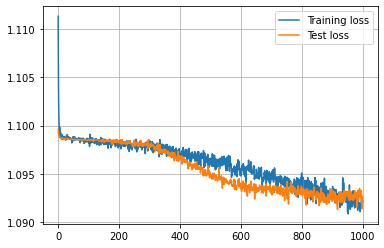

In [77]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

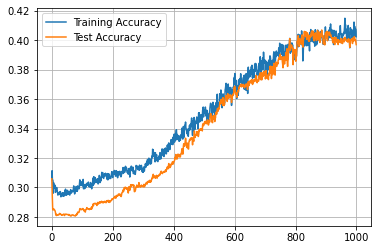

In [78]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()

In [79]:
#saving the model

MODEL_PATH = 'teammodel.pth'
torch.save(model, MODEL_PATH)

In [80]:
model = torch.load(MODEL_PATH)

In [81]:
#Evaluation
classes = ['Loss','Draw','Win']
predict_list = []
y_pred = model(Team_Test)

for i, p in enumerate(y_pred):
    y_pred = torch.max(p.data, 0)[1]
    predict_list.append(y_pred)
stacked_tensor = torch.stack(predict_list)
y_test = y_test.cpu()

In [82]:
print(classification_report(y_test, stacked_tensor, target_names=classes))

              precision    recall  f1-score   support

        Loss       0.32      0.67      0.44      1189
        Draw       0.24      0.05      0.08      1102
         Win       0.54      0.43      0.48      1959

    accuracy                           0.40      4250
   macro avg       0.37      0.38      0.33      4250
weighted avg       0.40      0.40      0.36      4250



Text(0.5, 15.0, 'Predicted label')

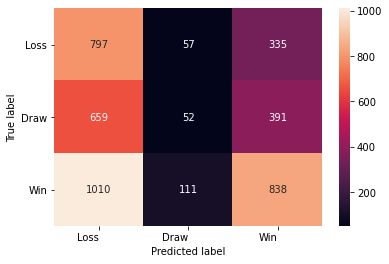

In [83]:
cm = confusion_matrix(y_test, stacked_tensor)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [84]:
correct = 0
total = 0

with torch.no_grad():
    for i, (x, y) in enumerate(test_loader):
        outputs = model(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 4250 matches: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 4250 matches: 39 %


In [85]:
Team_Train1 = Team_Train.unsqueeze(1)
Team_Train1.size()

torch.Size([16996, 1, 81])

In [86]:
Team_Test1 = Team_Test.unsqueeze(1)
Team_Test1.size()

torch.Size([4250, 1, 81])

In [142]:
import torch.utils.data as data_utils

train1 = data_utils.TensorDataset(Team_Train1, y_train)
train_loader1 = data_utils.DataLoader(train1, batch_size=128, shuffle=True)


test1 = data_utils.TensorDataset(Team_Test1, y_test)
test_loader1 = data_utils.DataLoader(test1, batch_size=128, shuffle=True)

In [143]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                nn.Conv1d(in_channels=1, out_channels=16, kernel_size=1, stride=1), # (N, 1, 9, 9) 
                nn.ReLU(),
                # output of our second conv layer
                nn.Conv1d(in_channels=16, out_channels=64, kernel_size=1, stride=1),
                nn.ReLU(), 
                nn.Conv1d(in_channels=64, out_channels=64, kernel_size=1, stride=1),
                nn.ReLU(),
                nn.AvgPool2d(kernel_size=8) 
                
        )
        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=24 of our second conv layer, and 3*3 is derived by the formular 
                # which is the output of each convolutional layer
                nn.Linear(in_features=80, out_features=64),          
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=64),
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=64),
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=3) # The output is 3 which should match the size of our class
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        return x

In [144]:
#Doing it on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Network()
net.to(device)

#Training
optimizer1 = optim.SGD(net.parameters(), lr=0.005)
criterion1 = nn.CrossEntropyLoss()


In [145]:
epochs = 100
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []

for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0

    net.train()
    
    total = 0
    # training our model
    for idx, (x, y) in enumerate(train_loader1):

        optimizer1.zero_grad()

        pred = net(x)
        loss = criterion1(pred, y)
        total_train_loss += loss.item()
        loss.backward(retain_graph=True)
        optimizer1.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
    accuracy_train = total / len(Team_Train1)
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    net.eval()
    total = 0
    for idx, (x, y) in enumerate(test_loader1):
        pred = net(x)
        loss = criterion1(pred, y)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy_val = total / len(Team_Test1)
    accuracy_total_val.append(accuracy_val)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 1 == 0:
          print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val))

Epoch: 0/100   Training loss: 1.0817   Testing loss: 1.0767   Train accuracy: 0.4071   Test accuracy: 0.4609  
Epoch: 1/100   Training loss: 1.0704   Testing loss: 1.0696   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 2/100   Training loss: 1.0658   Testing loss: 1.0634   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 3/100   Training loss: 1.0642   Testing loss: 1.0660   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 4/100   Training loss: 1.0637   Testing loss: 1.0627   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 5/100   Training loss: 1.0634   Testing loss: 1.0646   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 6/100   Training loss: 1.0633   Testing loss: 1.0641   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 7/100   Training loss: 1.0633   Testing loss: 1.0642   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 8/100   Training loss: 1.0631   Testing loss: 1.0616   Train accuracy: 0.4586   Test accuracy: 0.4609  
E

Epoch: 74/100   Training loss: 1.0568   Testing loss: 1.0576   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 75/100   Training loss: 1.0566   Testing loss: 1.0590   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 76/100   Training loss: 1.0565   Testing loss: 1.0583   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 77/100   Training loss: 1.0565   Testing loss: 1.0568   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 78/100   Training loss: 1.0564   Testing loss: 1.0601   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 79/100   Training loss: 1.0563   Testing loss: 1.0596   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 80/100   Training loss: 1.0562   Testing loss: 1.0579   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 81/100   Training loss: 1.0561   Testing loss: 1.0600   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 82/100   Training loss: 1.0560   Testing loss: 1.0584   Train accuracy: 0.4586   Test accuracy: 0

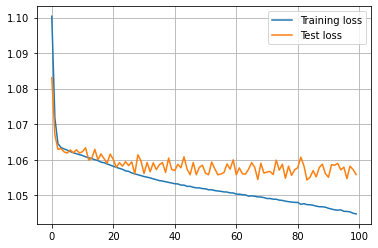

In [51]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

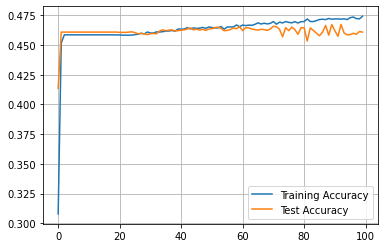

In [52]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()

In [53]:
#saving the model

MODEL_PATH = 'teamConmodel.pth'
torch.save(net, MODEL_PATH)

In [54]:
net = torch.load(MODEL_PATH)

In [55]:
#Evaluation
classes = ['Loss','Draw','Win']
predict_list = []
y_pred = net(Team_Test1)

for i, p in enumerate(y_pred):
    y_pred = torch.max(p.data, 0)[1]
    predict_list.append(y_pred)
stacked_tensor = torch.stack(predict_list)
y_test = y_test.cpu()

print(classification_report(y_test, stacked_tensor, target_names=classes))

              precision    recall  f1-score   support

        Loss       0.37      0.20      0.26      1189
        Draw       0.00      0.00      0.00      1102
         Win       0.48      0.88      0.62      1959

    accuracy                           0.46      4250
   macro avg       0.28      0.36      0.29      4250
weighted avg       0.32      0.46      0.36      4250



Text(0.5, 15.0, 'Predicted label')

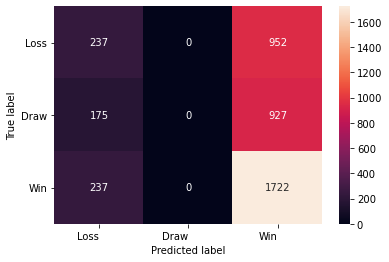

In [56]:
cm = confusion_matrix(y_test, stacked_tensor)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [57]:
correct = 0
total = 0

with torch.no_grad():
    for i, (x, y) in enumerate(test_loader1):
        outputs = net(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 4250 matches: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 4250 matches: 46 %


In [1]:
Team_Train

NameError: name 'Team_Train' is not defined